<a href="https://colab.research.google.com/github/Toadoum/Prediction-of-Score-based-on-hours-of-Study-LR-/blob/main/GRIP_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SAKAYO TOADOUM SARI**
#### *Data Science & Business Analytics Intern at Spark Foundation*

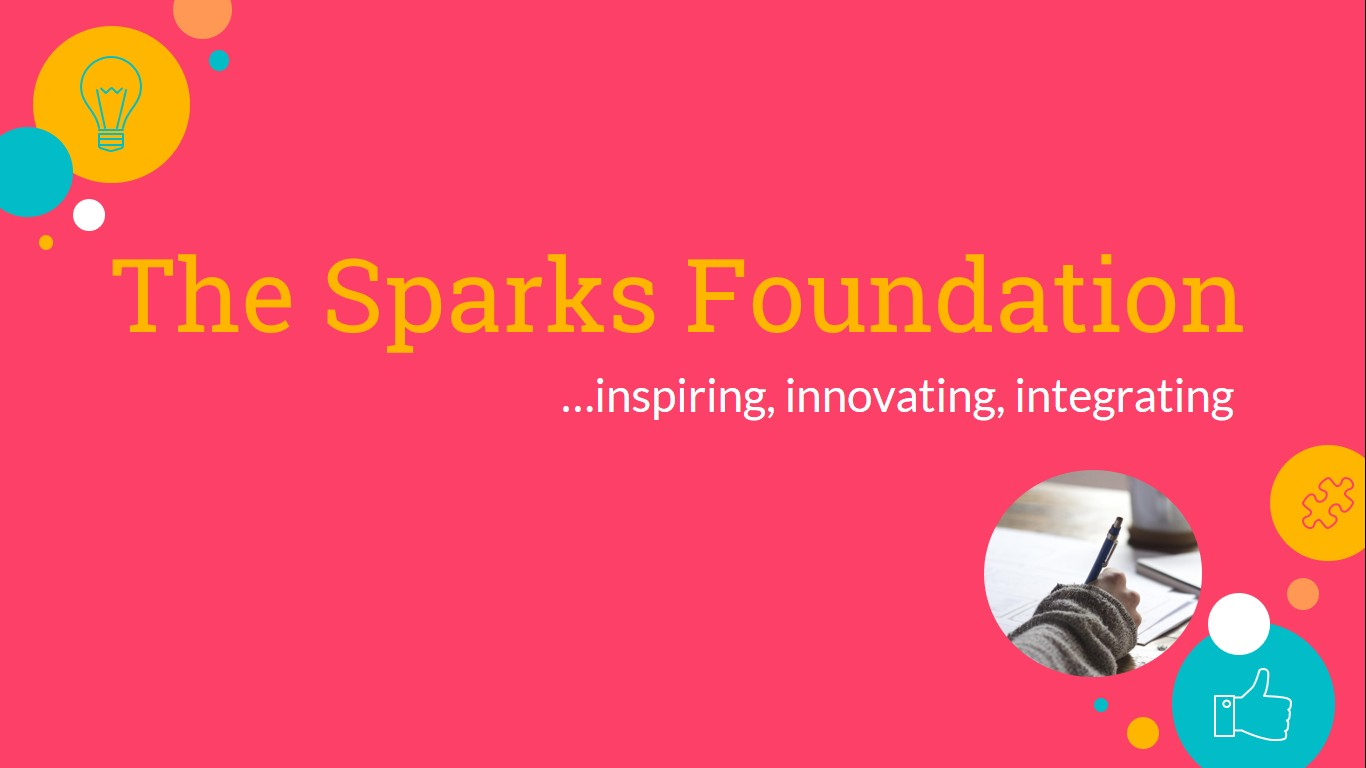

### TASK1
#### *Prediction using supervised Machine Learning*

### **Aim of the project: predict the percentage of an student based on the number of study hours**

### **IMPORTING LIBRARIES**

In [464]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### **Read the Dataset**

In [465]:
data=pd.read_csv('/content/task1.txt')

In [466]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [467]:
data.shape

(25, 2)

In [468]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [469]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


There is no missing values in the dataset

Let us check the relationship between the two variables by using scatterplot

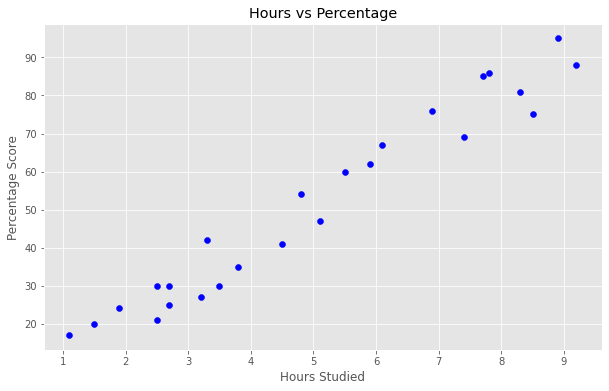

In [470]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.scatter(data['Hours'], data['Scores'], c='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the plot above, we can clearly see that there is a positive linear relationship between the number of hours studied and percentage of score

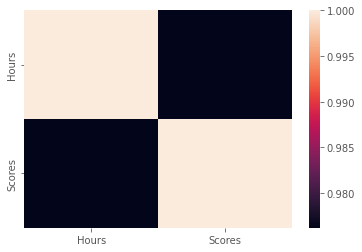

In [471]:
sns.heatmap(data.corr())

A strong positive correlation between the two variables

The code bellow will help us to split our dataset into train and test set (inputs and targets)

In [472]:
def split_data(df, train_percent):
  np.random.seed(3)
  perm=np.random.permutation(df.index)

  n=len(df)

  train_index=int(train_percent*n)
  train=df.iloc[perm[:train_index]]
  test=df.iloc[perm[train_index:]]

  X_train=train.iloc[:, :-1]
  Y_train=train.iloc[:, -1]

  X_test=test.iloc[:, :-1]
  Y_test=test.iloc[:, -1]

  return X_train, X_test, Y_train, Y_test

In [473]:
X_train, X_test, Y_train, Y_test =split_data(data, 0.8)

### **LINEAR REGRESSION WITH STOCHASTIC GRADIENT DESCENT**

In this project, we will write down our linear regression from scratch using stochastic gradient descent to predict score of student based on the numbers of hours of study (target).

We are using linear regression because we have only two variable and the dataset is small.

$$y=θx+b$$
is the regression line with $y$ our target and $x$ feature our input

In [474]:
import numpy as np
class SGD:
  def __init__(self, lr, epoch):
    self.lr=lr
    self.epoch=epoch
    self.theta=None
    self.cost_history=None

  def add_ones(self,X):
    self.X=X
    X_new=np.hstack([np.ones((self.X.shape[0], 1)), self.X])
    return X_new

  def compute_cost(self, X, y, theta):
    loss = ((X.dot(self.theta)-y)**2)
    return np.sum(loss)


  def Train(self, X, y):
    m = len(y)
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    
    self.cost_history = np.zeros(self.epoch)
    for i in range(self.epoch):
      np.random.seed(3)
      perm = np.random.permutation(len(X_train))
      X = X[perm]
      y = y.iloc[perm]
      for j in range(len(X)):
        theta_new = self.theta - self.lr*X[j].T.dot(X[j].dot(self.theta) - y.iloc[j])
        self.theta = theta_new 
        self.cost_history[i] = self.compute_cost(X, y,self.theta)
        return  self.theta, self.cost_history
  
  def predict(self,X):
    X=self.add_ones(X.values)
    yPred=X@theta
    return yPred

  def mse(self,y, yPred) :
    self.y=y
    mse=np.square(np.subtract(y,yPred)).mean()
    return mse

In [475]:
model=SGD(0.03, 200)

### **Training our model**

In [476]:
theta,train_loss= model.Train(X_train, Y_train)

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [477]:
yPred=model.predict(X_test)
yPred

array([75.06, 26.55, 83.97, 85.95, 78.03])

In [478]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': yPred})  
df 

,Actual,Predicted
19,69,75.06
0,21,26.55
8,81,83.97
3,75,85.95
10,85,78.03


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We are using Root mean square Error because it is a regression task.

In [479]:
MSE=model.mse(Y_test,yPred)

RMSE=np.sqrt(MSE)
RMSE

6.9975767234093285

In [480]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, yPred)) 

Mean Absolute Error: 6.500000000000003


In [486]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X_test) 
lm.fit(X_poly, Y_test)
yp=lm.predict(X_poly)

In [487]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, yp)) 

Mean Absolute Error: 4.242612598613347


In [488]:
MSE=model.mse(Y_test,yp)

RMSE=np.sqrt(MSE)
RMSE

5.129813814806844

### **Training Loss plot**

We can see that our model converge based on this plot of our training loss

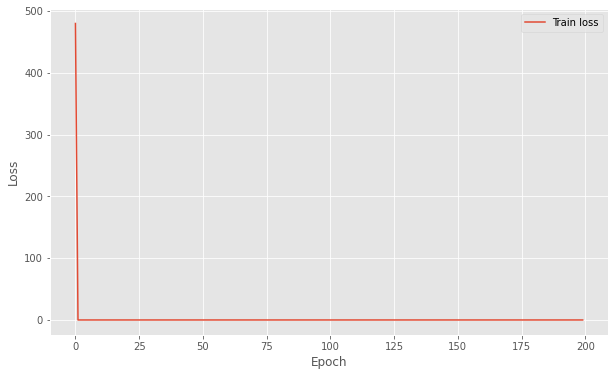

In [481]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.plot(train_loss, label='Train loss')
#plt.plot(losses_test, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Making prediction in a new data**

In [482]:
new = {'Hours':[9.25]}
df = pd.DataFrame(new)

In [490]:
# You can also test with your own data 
own_pred = model.predict(df)
print("Number of Hours = {}".format(new['Hours']))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = [9.25]
Predicted Score = 93.375


##END##

## **github.com/Toadoum**